In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [13]:
bil = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/billboard/billboard_weekly.pkl')
bil['uri'] = 'spotify:track:' + bil['song_id']
audio = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/spotify_data/billboard_audio_features.pkl')
audio = audio.drop_duplicates()
merged = pd.merge(bil, audio, how='left', on='uri')
merged.dropna(inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254867 entries, 0 to 254886
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              254867 non-null  object 
 1   song              254867 non-null  object 
 2   artist            254867 non-null  object 
 3   song_id           254867 non-null  object 
 4   uri               254867 non-null  object 
 5   acousticness      254867 non-null  float64
 6   danceability      254867 non-null  float64
 7   duration_ms       254867 non-null  float64
 8   energy            254867 non-null  float64
 9   instrumentalness  254867 non-null  float64
 10  key               254867 non-null  float64
 11  liveness          254867 non-null  float64
 12  loudness          254867 non-null  float64
 13  mode              254867 non-null  float64
 14  speechiness       254867 non-null  float64
 15  tempo             254867 non-null  float64
 16  time_signature    25

In [14]:
merged['date'] = pd.to_datetime(merged['date'])
merged['month'] = merged['date'].dt.strftime('%Y-%m')
merged['month'] = pd.to_datetime(merged['month'])
monthly_df = merged.groupby('month').mean()
monthly_df = monthly_df.reset_index()
monthly_df = monthly_df[('1975-01-01' <= monthly_df['month']) & (monthly_df['month'] <= '2021-10-01')]
monthly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/2162386912.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_df = merged.groupby('month').mean()


,month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
24,1975-01-01,0.358626,0.591538,224563.8050,0.579553,0.064224,5.0625,0.197377,-10.259368,0.8125,0.052111,115.325083,3.9575,0.672567
25,1975-02-01,0.368940,0.588253,220808.0600,0.588122,0.050941,5.4350,0.181158,-10.012720,0.8600,0.050159,115.271552,3.9500,0.665122
26,1975-03-01,0.334843,0.590070,229350.4920,0.581048,0.054995,5.8280,0.184357,-10.316240,0.8400,0.050184,114.686858,3.9220,0.664684
27,1975-04-01,0.338728,0.580120,236438.6350,0.551515,0.069511,6.1125,0.158960,-10.934342,0.7850,0.052581,117.653617,3.9000,0.653632
28,1975-05-01,0.337907,0.571930,234010.9940,0.587851,0.076120,5.7140,0.163500,-10.626060,0.7500,0.057598,121.127004,3.9060,0.668920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2021-06-01,0.236636,0.663382,192765.3875,0.604500,0.000449,5.2550,0.179318,-6.803228,0.6750,0.142282,122.396225,3.9575,0.464047
582,2021-07-01,0.217580,0.651402,193346.3260,0.635346,0.002264,5.2460,0.193207,-6.248534,0.6860,0.114297,123.421260,3.9820,0.499031
583,2021-08-01,0.210171,0.657075,193621.0700,0.642460,0.006846,5.3675,0.180522,-6.190460,0.6825,0.110391,124.751413,3.9675,0.523641
584,2021-09-01,0.213370,0.642172,205435.6775,0.638335,0.002790,5.3075,0.183702,-6.215815,0.7025,0.122931,124.047017,3.9625,0.495950


In [20]:
misery = pd.read_csv('/Users/kohtaasakura/PyDev/grad_thesis/economic_indicators/misery_index.csv')
misery.head()

,DATE,UNRATE_CPIAUCSL_PC1
0,1975-01-01,19.85214
1,1975-02-01,19.30507
2,1975-03-01,19.06025
3,1975-04-01,18.98711
4,1975-05-01,18.25926


In [21]:
misery.columns = ['date', 'unrate_cpi']
misery['date'] = pd.to_datetime(misery['date'])
misery = misery[misery['date'] <= '2021-10-01']

<AxesSubplot: >

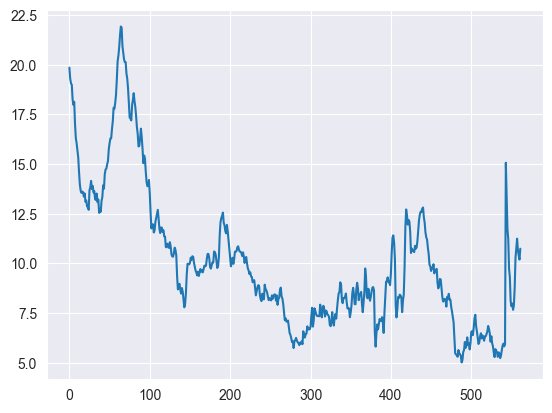

In [23]:
misery['unrate_cpi'].plot()

In [24]:
adf_test = adfuller(misery['unrate_cpi'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical values :')
for k, v in adf_test[4].items():
    print('\t', k, v)

ADF Statistic: -2.993931
p-value: 0.035465
Critical values :
	 1% -3.442081300525009
	 5% -2.8667149792729596
	 10% -2.569526100127551


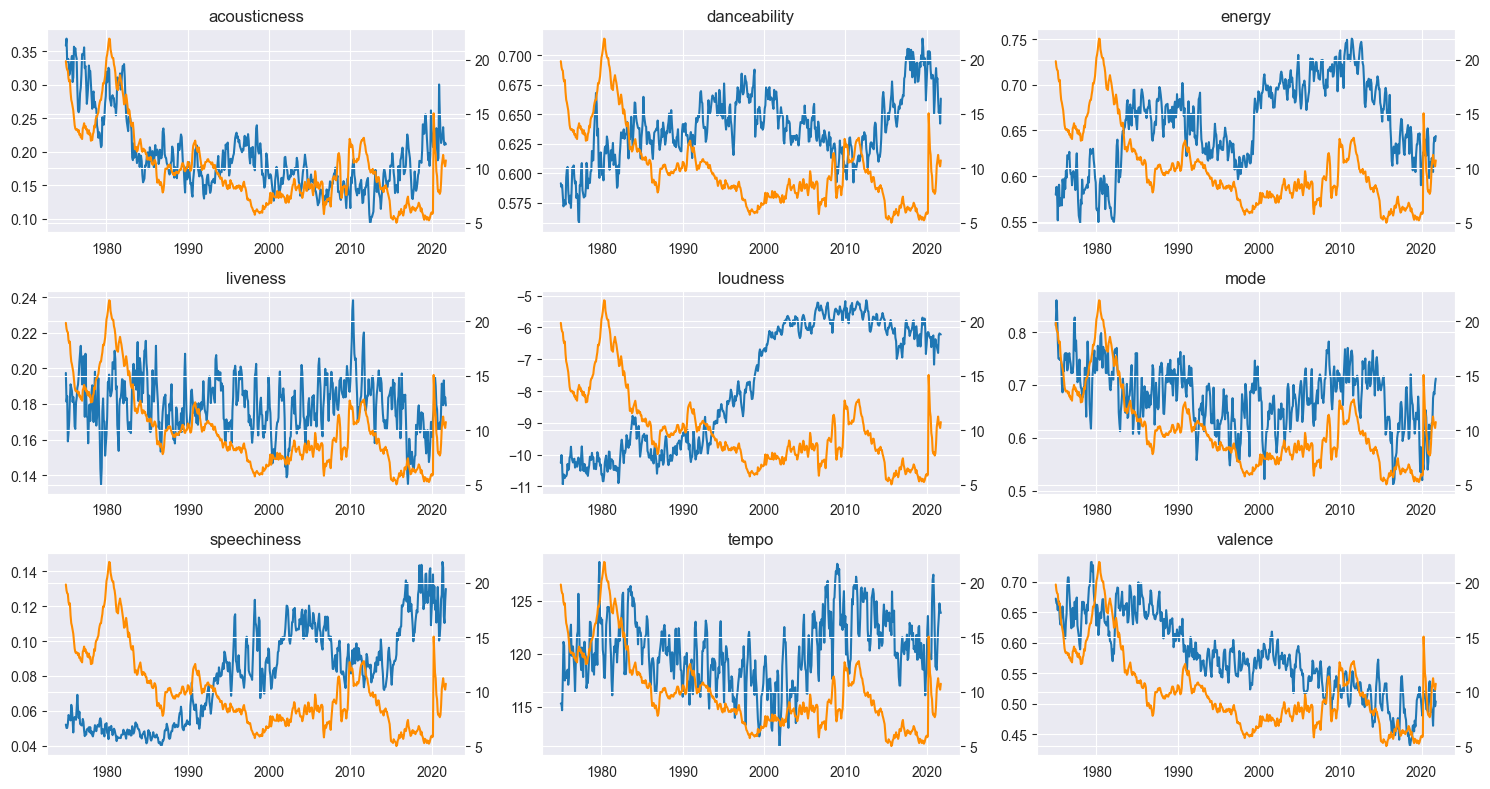

In [29]:
fig = plt.figure(figsize=[15, 8])

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x = monthly_df['month']

y1 = monthly_df['acousticness']
y2 = monthly_df['danceability']
y3 = monthly_df['energy']
y4 = monthly_df['liveness']
y5 = monthly_df['loudness']
y6 = monthly_df['mode']
y7 = monthly_df['speechiness']
y8 = monthly_df['tempo']
y9 = monthly_df['valence']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)

ax1_1 = ax1.twinx()
ax2_1 = ax2.twinx()
ax3_1 = ax3.twinx()
ax4_1 = ax4.twinx()
ax5_1 = ax5.twinx()
ax6_1 = ax6.twinx()
ax7_1 = ax7.twinx()
ax8_1 = ax8.twinx()
ax9_1 = ax9.twinx()

z = misery['unrate_cpi']

ax1_1.plot(x, z, color='darkorange')
ax2_1.plot(x, z, color='darkorange')
ax3_1.plot(x, z, color='darkorange')
ax4_1.plot(x, z, color='darkorange')
ax5_1.plot(x, z, color='darkorange')
ax6_1.plot(x, z, color='darkorange')
ax7_1.plot(x, z, color='darkorange')
ax8_1.plot(x, z, color='darkorange')
ax9_1.plot(x, z, color='darkorange')

ax1.set_title('acousticness')
ax2.set_title('danceability')
ax3.set_title('energy')
ax4.set_title('liveness')
ax5.set_title('loudness')
ax6.set_title('mode')
ax7.set_title('speechiness')
ax8.set_title('tempo')
ax9.set_title('valence')


fig.tight_layout()
plt.show()

In [25]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = monthly_df['acousticness']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     367.6
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           2.25e-63
Time:                        14:21:01   Log-Likelihood:                 974.30
No. Observations:                 562   AIC:                            -1945.
Df Residuals:                     560   BIC:                            -1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0954      0.005     17.537      0.0

In [26]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = monthly_df['liveness']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     30.55
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           5.00e-08
Time:                        14:21:51   Log-Likelihood:                 1564.5
No. Observations:                 562   AIC:                            -3125.
Df Residuals:                     560   BIC:                            -3116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1695      0.002     89.053      0.0

In [27]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = monthly_df['mode']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     232.2
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.13e-44
Time:                        14:22:08   Log-Likelihood:                 912.40
No. Observations:                 562   AIC:                            -1821.
Df Residuals:                     560   BIC:                            -1812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5910      0.006     97.282      0.0

In [28]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = monthly_df['tempo']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.41
Date:                Fri, 27 Jan 2023   Prob (F-statistic):            0.00133
Time:                        14:22:41   Log-Likelihood:                -1445.2
No. Observations:                 562   AIC:                             2894.
Df Residuals:                     560   BIC:                             2903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.0911      0.403    295.441      0.0

In [31]:
cycle, trend = sm.tsa.filters.hpfilter(monthly_df.danceability, 129600)
danceability_decomp  = monthly_df[['danceability']]
danceability_decomp['cycle'] = cycle
danceability_decomp['trend'] = trend

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/1245683258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceability_decomp['cycle'] = cycle
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/1245683258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceability_decomp['trend'] = trend


In [32]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = danceability_decomp['cycle']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.328
Date:                Fri, 27 Jan 2023   Prob (F-statistic):              0.250
Time:                        14:25:36   Log-Likelihood:                 1637.2
No. Observations:                 562   AIC:                            -3270.
Df Residuals:                     560   BIC:                            -3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.002      1.087      0.2

In [33]:
cycle, trend = sm.tsa.filters.hpfilter(monthly_df.energy, 129600)
energy_decomp  = monthly_df[['energy']]
energy_decomp['cycle'] = cycle
energy_decomp['trend'] = trend

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/215979156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_decomp['cycle'] = cycle
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/215979156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_decomp['trend'] = trend


In [34]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = energy_decomp['cycle']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6230
Date:                Fri, 27 Jan 2023   Prob (F-statistic):              0.430
Time:                        14:26:30   Log-Likelihood:                 1444.3
No. Observations:                 562   AIC:                            -2885.
Df Residuals:                     560   BIC:                            -2876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.002      0.745      0.4

In [36]:
cycle, trend = sm.tsa.filters.hpfilter(monthly_df.loudness, 129600)
loudness_decomp = monthly_df[['loudness']]
loudness_decomp['cycle'] = cycle
loudness_decomp['trend'] = trend

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/1837630178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loudness_decomp['cycle'] = cycle
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/1837630178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loudness_decomp['trend'] = trend


In [37]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = loudness_decomp['cycle']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.085
Date:                Fri, 27 Jan 2023   Prob (F-statistic):              0.298
Time:                        14:27:50   Log-Likelihood:                -113.51
No. Observations:                 562   AIC:                             231.0
Df Residuals:                     560   BIC:                             239.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0370      0.038      0.983      0.3

In [38]:
cycle, trend = sm.tsa.filters.hpfilter(monthly_df.speechiness, 129600)
speechiness_decomp = monthly_df[['speechiness']]
speechiness_decomp['cycle'] = cycle
speechiness_decomp['trend'] = trend

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/3323490069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speechiness_decomp['cycle'] = cycle
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/3323490069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speechiness_decomp['trend'] = trend


In [40]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = speechiness_decomp['cycle']
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3304
Date:                Fri, 27 Jan 2023   Prob (F-statistic):              0.566
Time:                        14:29:48   Log-Likelihood:                 1898.8
No. Observations:                 562   AIC:                            -3794.
Df Residuals:                     560   BIC:                            -3785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.542      0.5

In [39]:
cycle, trend = sm.tsa.filters.hpfilter(monthly_df.valence, 129600)
valence_decomp  = monthly_df[['valence']]
valence_decomp['cycle'] = cycle
valence_decomp['trend'] = trend

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/1486350775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valence_decomp['cycle'] = cycle
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_87079/1486350775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valence_decomp['trend'] = trend


In [41]:
x = misery['unrate_cpi']
x = sm.add_constant(x)
y = valence_decomp['cycle']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04076
Date:                Fri, 27 Jan 2023   Prob (F-statistic):              0.840
Time:                        14:29:53   Log-Likelihood:                 1325.5
No. Observations:                 562   AIC:                            -2647.
Df Residuals:                     560   BIC:                            -2638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.003      0.190      0.8